In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

lectures.csv: данные для лекций, просмотренных студентами по мере их обучения.
lecture_id: внешний ключ для столбца content_type_id в train.csv, если тип контента - лекция (1).
part: раздел, к которому относится лекция.
tag: один тег для каждой лекции. Значения тегов не представлены, но их достаточно для кластеризации лекций.
type_of: краткое описание основной цели лекции.

In [3]:
# считываем данные из файла lectures.csv в df, выводим размерность
df_lectures = pd.read_csv('D:\data\lectures.csv', sep=',')
df_lectures.shape

(418, 4)

In [4]:
# статистика
df_lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [5]:
df_lectures.describe() # статистика по числовым признакам 

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [6]:
# отображение первых трех строк df
df_lectures.head(3)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept


In [7]:
# отображение последних трех строк df
df_lectures.tail(3)

,lecture_id,tag,part,type_of
415,32604,24,6,concept
416,32625,142,2,concept
417,32736,82,3,concept


In [8]:
# проверка на дубликаты
df_lectures.duplicated().sum()

0

In [9]:
# проверка на пропуски 
df_lectures.isna().sum()

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

<AxesSubplot: xlabel='part', ylabel='Count'>

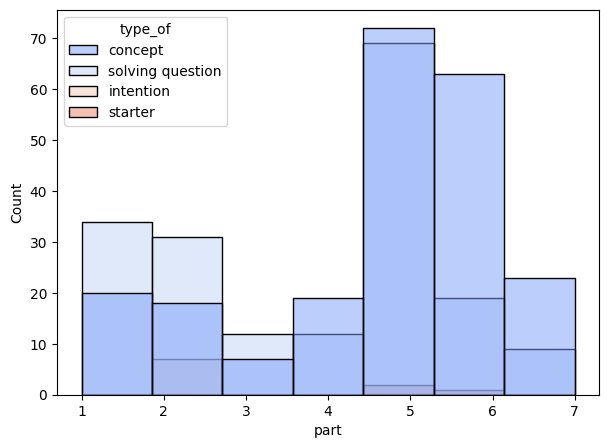

In [10]:
# определение связи между описанием лекций и разделами, в разделах с 4 по 7 больше теории, нежели практики
fig = plt.figure(figsize=(7,5))
sns.histplot(data = df_lectures, # какой датафрейм используем
             x = 'part', # какую переменную отрисовываем
             hue = 'type_of', # какую переменную используем для подкрашиваиния данных. 
             bins = 7, # на сколько ячеек разбиваем 
             palette='coolwarm') # какую цветовую карту используем.

<AxesSubplot: xlabel='part', ylabel='tag'>

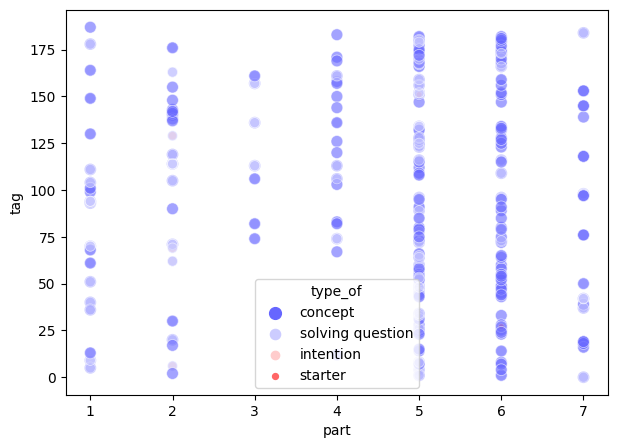

In [11]:
# распределение данных
plt.figure(figsize=(7, 5))
sns.scatterplot(    
    data = df_lectures, # какой датафрейм используем
    x="part", # какую переменную используем для горизонтальной оси
    y="tag",# какую переменную используем для вертикальной оси
    hue="type_of", # какую переменную используем для подкрашиваиния данных.
    size = "type_of", # какую переменную используем для задания размера
    alpha = 0.6, # прозрачность
             palette='bwr' # какую цветовую карту используем.
)

questions.csv: данные для заданных студентам вопросов.
question_id: внешний ключ для столбца content_type_id в train.csv, если тип контента - вопрос (0).
bundle_id: идентификатор совместного набора вопросов.
correct_answer: правильный ответ на вопрос. Можно сравнить со столбцом user_answer в train.csv, чтобы проверить, верно ли ответил студент.
part: соответствующий раздел теста TOEIC.
tags: один или несколько подробных тегов для каждого вопроса. Значения тегов не представлены, но их достаточно для кластеризации вопросов.

In [12]:
# считываем данные из файла questions.csv в df, выводим размерность
df_questions = pd.read_csv('D:\data\questions.csv', sep=',') 
df_questions.shape 

(13523, 5)

In [13]:
# статистика
df_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [14]:
df_questions.describe() # статистика по числовым признакам

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [15]:
# отображение первых трех строк df
df_questions.head(3)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92


In [16]:
# отображение последних трех строк df
df_questions.tail(3)

,question_id,bundle_id,correct_answer,part,tags
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125
13522,13522,13522,3,5,55


In [17]:
# проверка на дубликаты
df_questions.duplicated().sum()

0

In [18]:
# проверка на пропуски 
df_questions.isna().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

In [19]:
# есть один пропуск в столбце tags
df_questions[df_questions.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


<AxesSubplot: xlabel='part', ylabel='Count'>

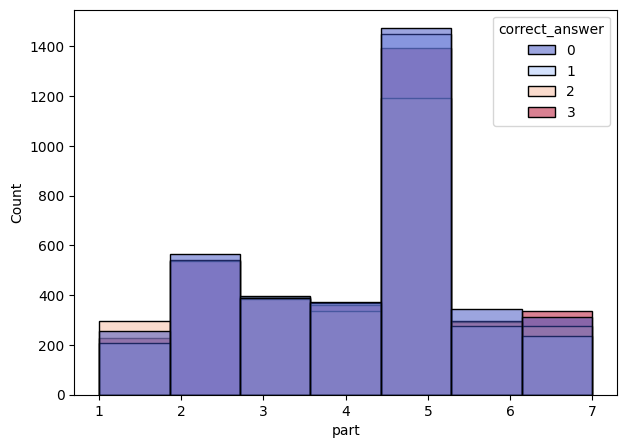

In [20]:
# определение связи между разделами и ответами, основную массу занимают ответы "0"
fig = plt.figure(figsize=(7,5))
sns.histplot(data = df_questions, # какой датафрейм используем
             x = 'part', # какую переменную отрисовываем
             hue = 'correct_answer', # какую переменную используем для подкрашиваиния данных. 
             bins = 7, # на сколько ячеек разбиваем 
             palette='coolwarm') # какую цветовую карту используем.

train.csv: данные ответов на заданные студентам вопросы.
row_id: (int64) идентификатор строки.
timestamp: (int64) время в миллисекундах между этим взаимодействием со студентом и завершением первого события от данного студента.
user_id: (int32) идентификатор студента.
content_id: (int16) идентификатор взаимодействия со студентом.
content_type_id: (int8) идентификатор типа контента. 0, если контентом был заданный студенту вопрос, 1 - просмотр студентом лекции.
task_container_id: (int16) идентификатор набора вопросов или лекций. Например, студент может увидеть три вопроса подряд, прежде чем увидит пояснения к какому-либо из них. Все три вопроса будут иметь общий идентификатор набора.
user_answer: (int8) ответ студента на вопрос, если они есть. Для лекций считать -1 как null.
answered_correctly: (int8) был ли ответ студента на вопрос правильным. Для лекций считать -1 как null.
prior_question_elapsed_time: (float32) среднее время в миллисекундах, затрачиваемое студентом для ответа на каждый вопрос из предыдущего набора вопросов, без учёта промежуточных лекций. Имеет значение null для 1-го набора вопросов или лекции.
prior_question_had_explanation: (bool) увидел ли студент объяснение и правильный ответ после ответа на предыдущий набор вопросов, без учёта промежуточных лекций. Это значение является общим для одного набора вопросов и имеет значение null для 1-го набора вопросов или лекции. Как правило, первые несколько вопросов, увиденные студентом, были частью вводного диагностического теста и не получили никакой обратной связи.

In [21]:
# считываем данные из файла train.csv в df, выводим размерность
df_train = pd.read_csv('D:/data/train.csv', sep=',') 
df_train.shape

(101230332, 10)

In [22]:
# статистика
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


In [23]:
df_train.describe() # статистика по числовым признакам

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [24]:
# отображение первых трех строк df
df_train.head(3)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False


In [25]:
# отображение последних трех строк df
df_train.tail(3)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True
101230331,101230331,428692118,2147482888,7995,0,26,3,1,29000.0,True


In [26]:
# проверка на дубликаты
df_train.duplicated().sum()

0

In [27]:
# проверка на пропуски 
df_train.isna().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

In [28]:
# prior_question_had_explanation: (bool) увидел ли студент объяснение и правильный ответ после ответа на предыдущий набор вопросов, 
# без учёта промежуточных лекций. Это значение является общим для одного набора вопросов и имеет значение null для 1-го набора вопросов или лекции. 
# Как правило, первые несколько вопросов, увиденные студентом, были частью вводного диагностического теста и не получили никакой обратной связи.
df_train[df_train.prior_question_had_explanation.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
96,96,0,5382,5000,0,0,0,1,NaN,NaN
224,224,0,8623,3915,0,0,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
101228989,101228989,0,2147470770,7900,0,0,0,1,NaN,NaN
101229217,101229217,0,2147470777,7900,0,0,2,0,NaN,NaN
101229975,101229975,0,2147481750,4137,0,0,0,0,NaN,NaN
101230025,101230025,0,2147482216,3748,0,0,1,0,NaN,NaN


In [29]:
# prior_question_elapsed_time: (float32) среднее время в миллисекундах, затрачиваемое студентом для ответа на каждый вопрос 
# из предыдущего набора вопросов, без учёта промежуточных лекций. Имеет значение null для 1-го набора вопросов или лекции.
df_train[df_train.prior_question_elapsed_time.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
89,89,653762,2746,6808,1,14,-1,-1,NaN,False
96,96,0,5382,5000,0,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
101230195,101230195,1073593458,2147482216,21887,1,170,-1,-1,NaN,False
101230218,101230218,1240316256,2147482216,6808,1,193,-1,-1,NaN,False
101230220,101230220,1240470616,2147482216,27699,1,195,-1,-1,NaN,False
101230222,101230222,1240524060,2147482216,5752,1,197,-1,-1,NaN,False


In [30]:
cat_columns = []
num_columns = []

for column_name in df_train.columns:
    if (df_train[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['prior_question_had_explanation'] 
 Число столблцов =  1
Числовые данные:	  ['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time'] 
 Число столблцов =  9


In [31]:
df = df_train.drop('row_id', axis = 1) # выкидываем столбец идентификаторов строки
# Изменяем формат хранения некоторых данных датафрейма df
df['timestamp'] = df['timestamp'].astype('uint64')
df['user_id'] = df['user_id'].astype('uint32')
df['content_id'] = df['content_id'].astype('uint16')
df['content_type_id'] = df['content_type_id'].astype('int8')
df['task_container_id'] = df['task_container_id'].astype('uint16')
df['user_answer'] = df['user_answer'].astype('int8')
df['answered_correctly'] = df['answered_correctly'].astype('int8')
df['prior_question_elapsed_time'] = df['prior_question_elapsed_time'].astype('float32')
df.info() # выводим справку о кол-ве значений в каждом столбце и формате данных датафрейма df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       uint64 
 1   user_id                         uint32 
 2   content_id                      uint16 
 3   content_type_id                 int8   
 4   task_container_id               uint16 
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  object 
dtypes: float32(1), int8(3), object(1), uint16(2), uint32(1), uint64(1)
memory usage: 2.9+ GB


In [32]:
# посмотрим корреляцию между числовыми признаками. Имеется выраженная корреляция (связь) между временем и идентификатором набора вопросов или лекций, 
# а также между идентификатор типа контента и был ли ответ студента на вопрос правильным
cm = sns.color_palette("vlag", as_cmap=True) # создадим цветовой стиль, чтобы раскрасить табличку

df.corr().style.background_gradient(cmap=cm, # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний  диапазон

C:\Users\zloi\AppData\Local\Temp\ipykernel_3412\3666405362.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap=cm, # наш цветовой стиль


,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
timestamp,1.000000,-0.000041,0.052931,0.000974,0.433359,0.000724,0.025452,0.013934
user_id,-0.000041,1.000000,0.000868,-0.000150,0.001498,0.000156,-0.000307,0.000308
content_id,0.052931,0.000868,1.000000,0.414640,0.046304,-0.106668,-0.196960,0.151661
content_type_id,0.000974,-0.000150,0.414640,1.000000,-0.019647,-0.279818,-0.436912,nan
task_container_id,0.433359,0.001498,0.046304,-0.019647,1.000000,0.008532,0.061129,-0.013412
user_answer,0.000724,0.000156,-0.106668,-0.279818,0.008532,1.000000,0.126471,0.014570
answered_correctly,0.025452,-0.000307,-0.196960,-0.436912,0.061129,0.126471,1.000000,-0.007900
prior_question_elapsed_time,0.013934,0.000308,0.151661,nan,-0.013412,0.014570,-0.007900,1.000000


Анализ статистики ответов студентов

In [33]:
# ищем кол-во уникальных идентификаторов студента
df.agg({'user_id': pd.Series.nunique}) 

user_id    393656
dtype: int64

In [37]:
# группируем общее кол-во ответов и кол-во правильных ответов каждого студента по его идентификатору в df
new_df = df[['user_id', 'user_answer', 'answered_correctly']].groupby(['user_id'], as_index = False).sum()

In [38]:
cm = sns.color_palette("vlag", as_cmap=True) # создадим цветовой стиль, чтобы раскрасить табличку

new_df.corr().style.background_gradient(cmap=cm, # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний  диапазон

,user_id,user_answer,answered_correctly
user_id,1.000000,0.000252,0.000110
user_answer,0.000252,1.000000,0.989367
answered_correctly,0.000110,0.989367,1.000000


In [39]:
# сократим разброс количества ответов студентов
def rem_emission(df, col, k_std): # задаём функцию сокращения разброса ответов
        mean = df[col].mean() # среднее значение переданного столбца col
        std_o = df[col].std() # стандартное отклонение переданного столбца col
        return df[(df[col] <= mean + (k_std * std_o))]

new_df = rem_emission(new_df, 'user_answer', 1) # вызываем функцию сокращения разброса ответов
# Добавляем столбец cor_ratio успеваемости (соотношения кол-ва правильных ответов к общему кол-ву ответов студентов)
new_df['cor_ratio'] = new_df.answered_correctly / new_df.user_answer
new_df # выводим первые 5 и последние 5 строк полученного new_df

,user_id,user_answer,answered_correctly,cor_ratio
0,115,72,32,0.444444
1,124,49,7,0.142857
2,2746,31,10,0.322581
3,5382,169,81,0.479290
4,8623,149,67,0.449664
...,...,...,...,...
393651,2147470770,308,171,0.555195
393652,2147470777,1066,514,0.482176
393653,2147481750,52,38,0.730769
393654,2147482216,363,172,0.473829


In [40]:
# после введения нового признака корреляция имеет незначительное изменение. корееляция нового признака с исходными данными мала
cm = sns.color_palette("vlag", as_cmap=True) # создадим цветовой стиль, чтобы раскрасить табличку

new_df.corr().style.background_gradient(cmap=cm, # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний  диапазон

,user_id,user_answer,answered_correctly,cor_ratio
user_id,1.000000,-0.000314,-0.000348,-0.001445
user_answer,-0.000314,1.000000,0.981904,0.224962
answered_correctly,-0.000348,0.981904,1.000000,0.303483
cor_ratio,-0.001445,0.224962,0.303483,1.000000


In [42]:
a_per_user_med = new_df.user_answer.median()
print('Медианное значение количества ответов студентов: ', a_per_user_med)

Медианное значение количества ответов студентов:  55.0


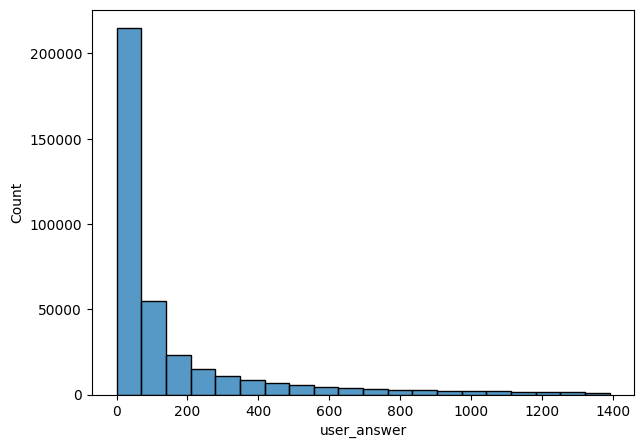

In [46]:
# Выводим распределение количества ответов студентов - похоже на нормальное распределение
plt.figure(figsize=(7,5))
sns.histplot(data = new_df,
            x='user_answer', bins = 20);

0.42748091603053434


<AxesSubplot: >

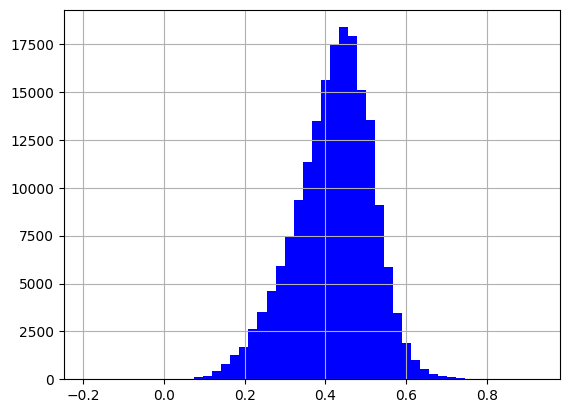

In [47]:
# Выводим распределение кол-ва ответов студентов, которое больше медианного, также похоже на нормальное
print(new_df.query('user_answer > 55')['cor_ratio'].median())
new_df.query('user_answer > 55')['cor_ratio'].hist(bins = 50, color = 'blue')